<a href="https://colab.research.google.com/github/pulavartivinay/Face_Mask_Detection/blob/retinaNet/retinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# start

In [ ]:
# installs
!pip3 install retinaface &> /dev/null

In [ ]:
# imports
import os
import random
import cv2 
from retinaface import RetinaFace
from google.colab.patches import cv2_imshow
import glob
import itertools

In [ ]:
# loading dataset
# https://github.com/X-zhangyang/Real-World-Masked-Face-Dataset

!gdown --id 1mNZ5eaoT9A0LdXLFZcE4lFeM9X6X7Cjt #loading the dataset from google drive link to colab
!unzip /content/rwmfd.zip &> /dev/null #unzipping
!rm -rf /content/rwmfd.zip &> /dev/null #deleting the zip file
!rm -rf __MACOSX &> /dev/null

Downloading...
From: https://drive.google.com/uc?id=1JvkgGgHswqfm7Ug9GdK9-CgnMpxDuoE6
To: /content/rwmfd.zip
157MB [00:02, 62.1MB/s]


In [ ]:
# pre processing the dataset
# https://stackoverflow.com/questions/18394147/recursive-sub-folder-search-and-return-files-in-a-list-python
# https://stackoverflow.com/questions/11574195/how-to-merge-multiple-lists-into-one-list-in-python

def generate_image_paths(dir_path):
  files_jpg = glob.glob(dir_path + '/**/*.jpg', recursive=True)
  files_jpeg = glob.glob(dir_path + '/**/*.jpeg', recursive=True)
  files_png = glob.glob(dir_path + '/**/*.png', recursive=True)
  files_webp = glob.glob(dir_path + '/**/*.webp', recursive=True)
  files_jfif = glob.glob(dir_path + '/**/*.jfif', recursive=True)
  paths = list(itertools.chain(files_jpg, files_jpeg, files_png, files_webp, files_jfif))
  return paths

dataset_path = "/content/rwmfd"
paths = generate_image_paths(dataset_path)

print(len(paths))

4194


In [ ]:
# retinaNet model, retinaFace for Face Detection
# https://pypi.org/project/retinaface/

def retinaFace_detector(image_path, detector):
  image = detector.read(image_path)
  faces = detector.predict(image)
  return faces

In [ ]:
# openCV image cropping function
# https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

def openCV_image_cropping(image_path, face):
  img = cv2.imread(image_path)
  crop_img = img[face["y1"]:face["y2"], face["x1"]:face["x2"]]
  return crop_img

model[normal quality] init ..
model success !


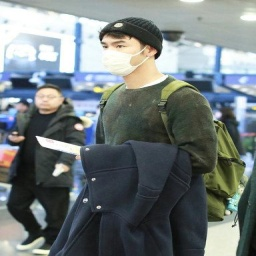

[{'x1': 98, 'y1': 29, 'x2': 141, 'y2': 77, 'left_eye': (104, 47), 'right_eye': (119, 47), 'nose': (103, 56), 'left_lip': (104, 66), 'right_lip': (115, 66)}, {'x1': 36, 'y1': 87, 'x2': 58, 'y2': 111, 'left_eye': (40, 96), 'right_eye': (50, 96), 'nose': (44, 100), 'left_lip': (41, 105), 'right_lip': (48, 106)}]


In [ ]:
# passing random image from the dataset through retinaNet Face Detection model and visualising the output

detector = RetinaFace(quality='normal')
random_image_path = random.choice(paths)
random_image = cv2.imread(random_image_path)
cv2_imshow(random_image)
faces = retinaFace_detector(random_image_path, detector)
print(faces)

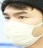

In [ ]:
# passing random image face detection output of retinaNet Face Detection model to openCV image cropping function and visualising the image
if(len(faces)>0):
  for face in faces:
      cropped_face = openCV_image_cropping(random_image_path, face)
      cv2_imshow(cropped_face)

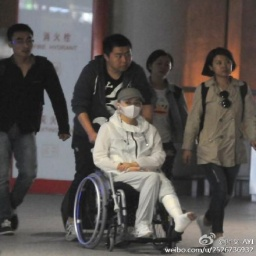

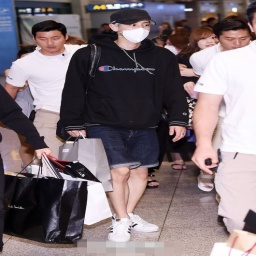

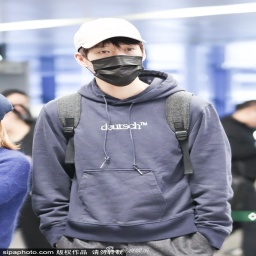

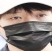

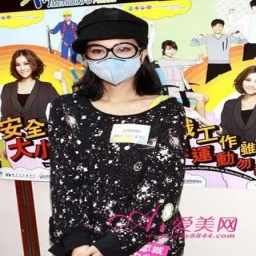

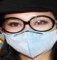

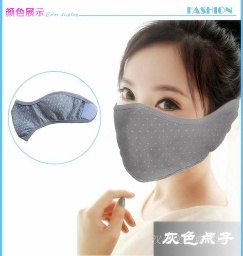

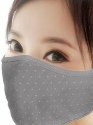

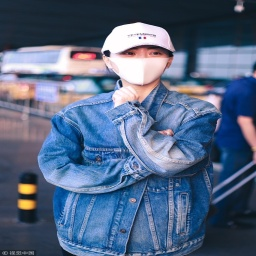

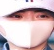

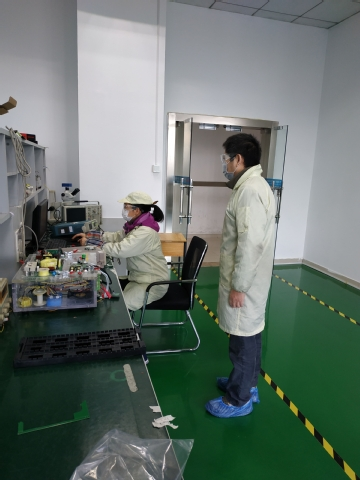

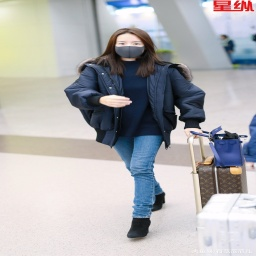

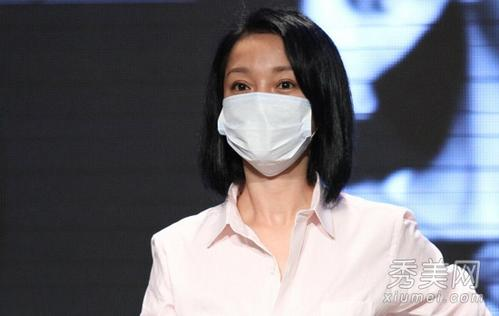

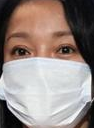

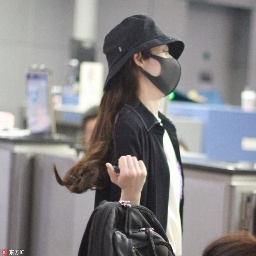

97

In [ ]:
# passing some images from the dataset through retinaNet Face Detection model and openCV image cropping function (no visualisation)
detected_faces = {}

random.seed(1)
random.shuffle(paths)

for image_path in paths[:100]:
  faces = retinaFace_detector(image_path, detector)
  if(len(faces)>0):
    for face in faces:
        cropped_face = openCV_image_cropping(image_path, face)
        detected_faces.setdefault(image_path, []).append(cropped_face) 

for i in range(10):
  image_path, cropped_faces = random.choice(list(detected_faces.items()))
  cv2_imshow(cv2.imread(image_path))
  for cropped_face in cropped_faces:
    cv2_imshow(cropped_face)

len(detected_faces)